In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [44]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [2]:
df=pd.read_csv('/content/tweets.csv' ,encoding='ISO-8859-1')

### Data insights

In [3]:
df.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [4]:
df.shape

(7920, 3)

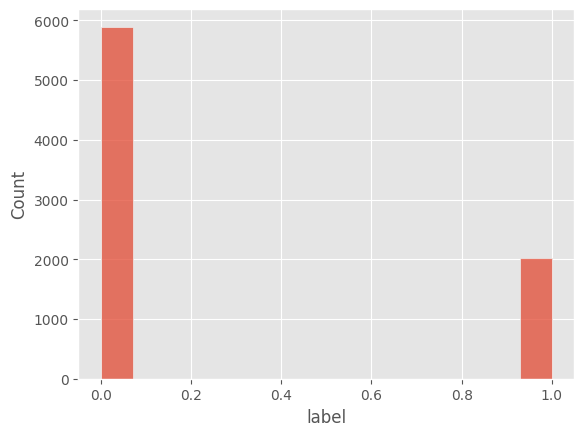

In [5]:
ax=sns.histplot(data=df['label'])
plt.show()

In [6]:
df['label'].value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [8]:
df['id'].nunique()

7920

### Data processing

In [9]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lem=WordNetLemmatizer()
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def lemm(text):
  lemm_text=[word_lem.lemmatize(word) for word in text]
  return lemm_text

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [12]:
url_pattern = r'https?://\S+|www\.\S+'

In [13]:
def cor_proces(content):
  cleaned_con = re.sub(url_pattern, '', content)
  non_pun=re.sub('[^a-zA-Z0-1]',' ',cleaned_con)
  doc = nlp(non_pun)

  # Define brand-related pattern

  # Filter tokens based on entity type and brand pattern
  brand_pattern = re.compile(r'\b(?:iphone|apple|sony|experia|samsung|amazon|google)\b', flags=re.IGNORECASE)

  # Filter tokens based on entity type and brand pattern
  filtered_tokens = [token.text for token in doc if
                    (token.ent_type_ == 'ORG' or brand_pattern.search(token.text.lower())) and
                    token.text.lower() not in ['iphone', 'apple', 'sony', 'experia', 'samsung', 'amazon', 'google']]

  # Join filtered tokens to form the processed text
  new_con = ' '.join([token.text for token in doc if token.text not in filtered_tokens])

  # Lowercase, tokenize, remove stopwords, and lemmatize
  lower_con = new_con.lower()
  stemmed_con = lower_con.split()
  sw_con = [i for i in stemmed_con if i not in sw]
  word_lem = WordNetLemmatizer()
  lemm_con = [word_lem.lemmatize(word) for word in sw_con]
  new_con = ' '.join(lemm_con)

  return new_con

In [14]:
test_con=df['tweet'][8]
test_con

'Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollowâ\x80¦ http://instagr.am/p/Vj6bg5tLql/'

In [15]:
 cor_proces(test_con)

'bout go shopping listening music iphone justme music likeforlike followforfollow'

In [16]:
df['new_content']=df['tweet'].apply(cor_proces)

In [17]:
df.head(4)

,id,label,tweet,new_content
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint android apps beautiful cute health...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...


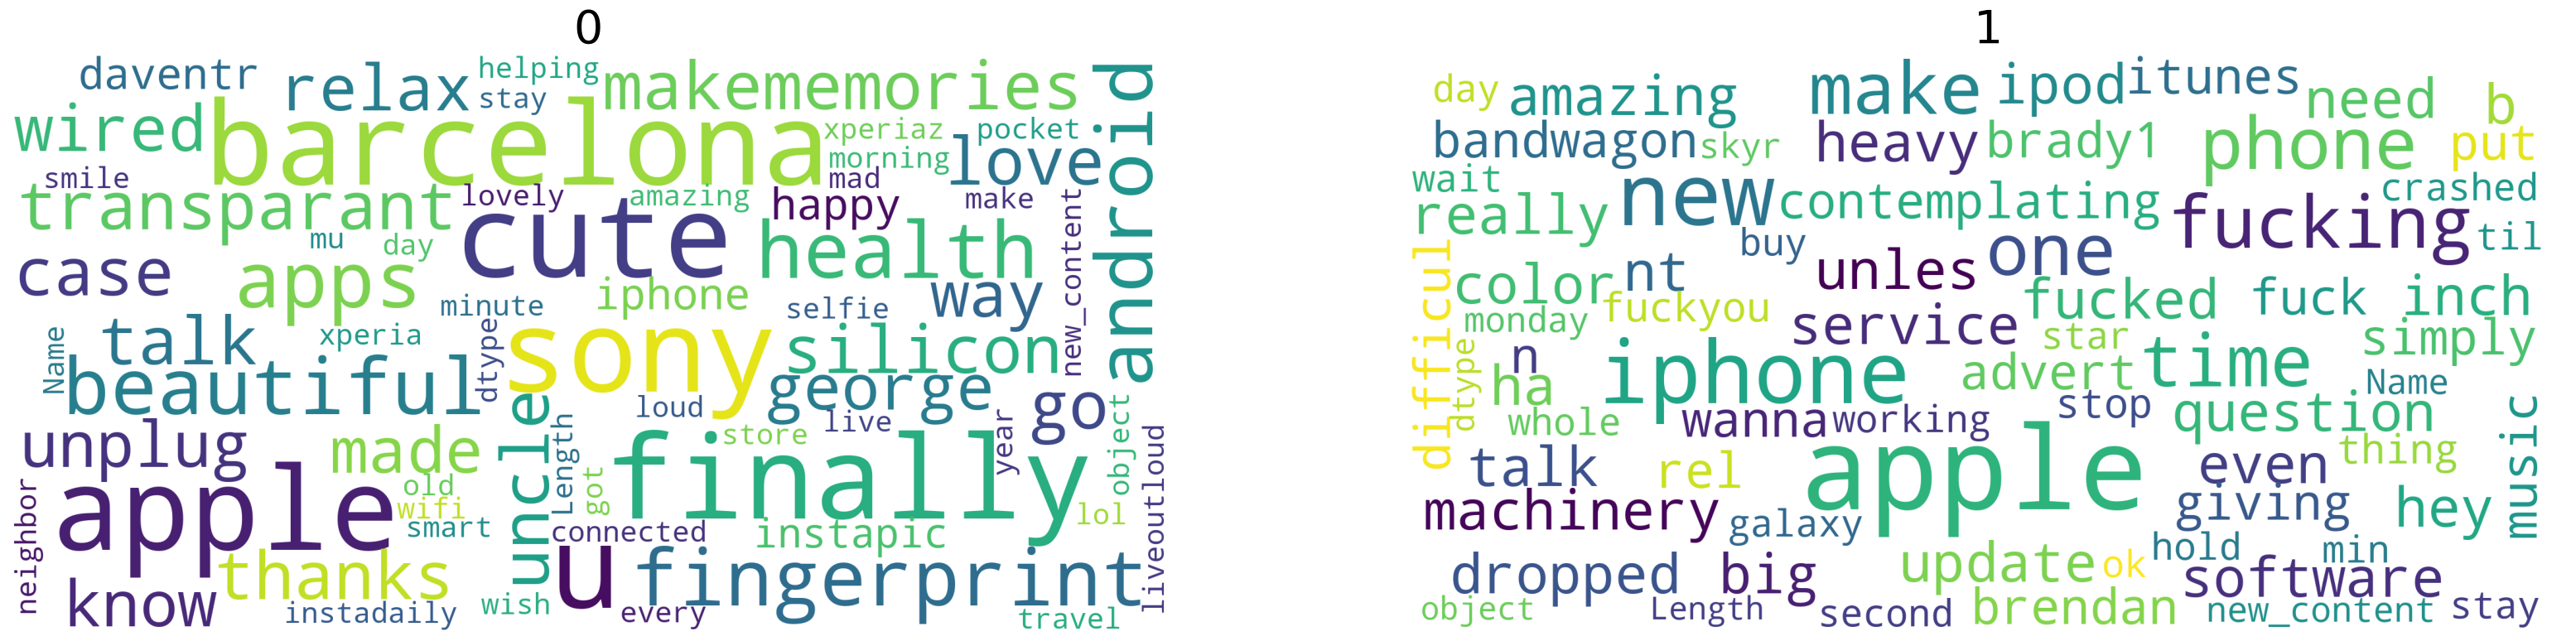

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['label'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df2 = df[df['label']==col]
    data = df2['new_content']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

### Balancing the classes

balancing the differance between the 1 and 0 by generating some data from given data

In [18]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [20]:
sia.polarity_scores(df['new_content'][0])

{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.7845}

In [ ]:
#  0 mean positive sentiment

In [21]:
sia.polarity_scores(df['new_content'][5])

{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.6597}

In [59]:
# 1 means negative sentiment

In [22]:
df.iloc[[0,5]]

,id,label,tweet,new_content
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint android apps beautiful cute health...
5,6,1,iPhone software update fucked up my phone big ...,iphone software update fucked phone big time


In [23]:
class_counts=df['label'].value_counts()
balance_samples = class_counts.max() - class_counts.min()

In [24]:
import random

In [25]:

Z =df['new_content'].loc[df['label']==1]

tokenized_words = [word for sentence in Z for word in sentence.split()]

min_words = min(len(sentence.split()) for sentence in Z)
max_words = max(len(sentence.split()) for sentence in Z)

# Function to generate a new sentence with a random number of words and negative sentiment
def generate_new_sentence(tokenized_words, min_words, max_words, threshold=-0.3):
    while True:
        num_words = random.randint(min_words, max_words)
        selected_words = random.sample(tokenized_words, num_words)
        new_sentence = ' '.join(selected_words)
        polarity_score = sia.polarity_scores(new_sentence)['compound']
        pos_score = sia.polarity_scores(new_sentence)['pos']
        if polarity_score < threshold and pos_score == 0:
            return new_sentence


new_sentences = [generate_new_sentence(tokenized_words, min_words, max_words) for _ in range(balance_samples)]


In [26]:
len(new_sentences)

3868

In [31]:
balanced_data = {'new_content': [], 'label': []}

for item in new_sentences:
    balanced_data['new_content'].append(item)
    balanced_data['label'].append(1)

balanced_df = pd.DataFrame(balanced_data)

balanced_df.head(4)

,new_content,label
0,market went calendar 1 convert somebody stripe...,1
1,page apple sony brand fix feelspic using froze...,1
2,song white fuck really get time new watch got ...,1
3,apple also sony still emilie note problem upda...,1


In [32]:
df1=df[['new_content','label']]
df1.head(4)

,new_content,label
0,fingerprint android apps beautiful cute health...,0
1,finally transparant silicon case thanks uncle ...,0
2,love would go talk makememories unplug relax i...,0
3,wired know george made way iphone cute daventr...,0


In [38]:
concated_df=pd.concat([df1,balanced_df],ignore_index=True)

In [40]:
df_shuffled = concated_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [42]:
df_shuffled.tail(5)

,new_content,label
11783,stifle ear purchase apple guess hate try said ...,1
11784,gain follower rt must follow follow back follo...,0
11785,sick buying new cell phone charger apple,1
11786,want download free iphone app today spread sty...,0
11787,got iphone hehe iphone apple new finally seb0 ...,1


In [43]:
X=df_shuffled['new_content']
y=df_shuffled['label']

train test split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Training the Model

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [52]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [54]:
clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [57]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9189991518235793


In [58]:
print("Classification Report: \n", classification_report(y_test, predictions))


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91      1166
           1       0.89      0.96      0.92      1192

    accuracy                           0.92      2358
   macro avg       0.92      0.92      0.92      2358
weighted avg       0.92      0.92      0.92      2358

